In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from kaggle_datasets import KaggleDatasets
import re

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt

In [2]:
# Read multiple CSv files into a list pandas Dataframes
# It's set up to loop over each Dataframe to perform operations

# List of file paths
file_paths = [
    "/kaggle/input/fake-news-content-and-title/news_file_en_1.csv",
    "/kaggle/input/fake-news-content-and-title/news_file_en_2.csv",
    "/kaggle/input/fake-news-content-and-title/news_file_en_3.csv",
    "/kaggle/input/fake-news-content-and-title/news_file_en_4.csv",
    "/kaggle/input/fake-news-content-and-title/news_file_en_5.csv",
    "/kaggle/input/fake-news-content-and-title/news_file_en_6.csv",
    "/kaggle/input/fake-news-content-and-title/news_file_en_7.csv"
]

# Read each CSV file into a list of DataFrames
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# # Iterate over each DataFrame and perform operations
for df in dfs:
      # Perform operations on each DataFrame
    pass  # Placeholder for operations


In [3]:
# Calculating date, month, year seperately to identify all the date elements in the Text

# Define functions to count dates, months, and years in text
def count_dates(text):
    date_pattern = r'\b\d{1,2}[-/]\d{1,2}[-/]\d{2,4}\b'  # Example: dd/mm/yyyy or dd-mm-yyyy
    dates_found = re.findall(date_pattern, str(text))
    return len(dates_found)

def find_months(text):
    month_pattern = r'\b(?:January|February|March|April|May|June|July|August|September|October|November|December)\b'
    months_found = re.findall(month_pattern, str(text))
    return len(months_found)

def find_years(text):
    year_pattern = r'\b\d{4}\b'
    years_found = re.findall(year_pattern, str(text))
    return len(years_found)

# Initialize total counts
total_date_count = 0
total_month_count = 0
total_year_count = 0

# Iterate over each DataFrame and perform operations
for df in dfs:
    
    # Apply count_dates function to each row to count dates in the full text
    df['date_count'] = df['content'].apply(count_dates)
    df['month_count'] = df['content'].apply(find_months)
    df['year_count'] = df['content'].apply(find_years)
    
    # Sum the date counts from each DataFrame
    total_date_count += df['date_count'].sum()
    total_month_count += df['month_count'].sum()
    total_year_count += df['year_count'].sum()

# Print the total count of dates
print("Total count of dates in all datasets:", total_date_count)
print("Total count of months in all datasets:", total_month_count)
print("Total count of years in all datasets:", total_year_count)

Total count of dates in all datasets: 157787
Total count of months in all datasets: 1692107
Total count of years in all datasets: 3520442


In [4]:
# Finding the URLs based on the Domain

# Initialize a dictionary to store the counts for each category
category_counts = {}

# Initialize a set to store unique websites
unique_websites = set()

# Iterate over each DataFrame and perform operations
for df in dfs:
    
    # Extract unique websites from the 'domain' column
    unique_websites.update(df['domain'].dropna())
    
    # Group by domain extension and calculate the count
    domain_extensions = df['domain'].apply(lambda x: x.split('.')[-1] if isinstance(x, str) else '').dropna()
    column_count = domain_extensions.groupby(domain_extensions).size()

    # Accumulate counts for each category
    for category, count in column_count.items():
        category_counts[category] = category_counts.get(category, 0) + count
    

# Print the total count for each category
print("Total count of URLs under each category:")
for category, count in category_counts.items():
    print(f"{category}: {count}")
    
# Calculate the total count of all categories
total_count_all_categories = sum(category_counts.values())

# Print the total count of all categories
print("Total count of all categories:", total_count_all_categories)

# Calculate the total count of unique websites
total_unique_website_count = len(unique_websites)

# Print the total count of unique websites
print("Total count of unique websites across all datasets:", total_unique_website_count)

Total count of URLs under each category:
208: 4
au: 377
co: 82
com: 1245266
il: 78
info: 737
is: 468
media: 150
net: 18458
org: 281190
su: 455
tv: 1341
uk: 161941
us: 2087
press: 14
biz: 63
ca: 202
me: 18
nz: 1
Total count of all categories: 1712932
Total count of unique websites across all datasets: 398


In [5]:
# Calculating the Numeric values in different datasets (Original Content, Cleaned Content)

# Define a function to count numeric values in text
def count_numeric_values(text):
    numeric_pattern = r'\b\d+\b'  # Match one or more digits
    numeric_values_found = re.findall(numeric_pattern, str(text))
    return len(numeric_values_found)

# Initialize total count
total_numeric_value_count_f = 0
total_numeric_value_count_c = 0
total_numeric_value_count_d = 0

for df in dfs:
    # Apply count_numeric_values function to each row to count numeric values in the full text
    df['numeric_value_count_f'] = df['content'].apply(count_numeric_values)
    df['numeric_value_count_a'] = df['case_content'].apply(count_numeric_values)
    df['numeric_value_count_c'] = df['cleaned_content'].apply(count_numeric_values)
    
    # Sum the numeric value counts from each DataFrame
    total_numeric_value_count_f += df['numeric_value_count_f'].sum()
    total_numeric_value_count_c += df['numeric_value_count_c'].sum()
    total_numeric_value_count_d += df['numeric_value_count_a'].sum()

# Print the total count of numeric values
print("Total count of numeric values in Content:", total_numeric_value_count_f)
print("Total count of numeric values in Case Content:", total_numeric_value_count_d)
print("Total count of numeric values in Cleaned Content:", total_numeric_value_count_c)

Total count of numeric values in Content: 17214226
Total count of numeric values in Case Content: 17120429
Total count of numeric values in Cleaned Content: 14828563


In [6]:
# Finding the 100 Most Frequent Words used in the Cleaned Content

# Initialize an empty Counter object to store word frequencies
word_freq_counter = Counter()

# Define a regular expression pattern to match words
word_pattern = r'\b[A-Za-z]+\b'

# Iterate over each DataFrame and perform operations
for df in dfs:
    # Convert all values in the 'cleaned_text' column to strings and join them
    all_text = ' '.join(str(text) for text in df['cleaned_content'] if isinstance(text, str))
    
    # Tokenize the text and count the frequency of each word
    words = re.findall(word_pattern, all_text)
    
    # Update the word frequency Counter
    word_freq_counter.update(words)

# Get the 100 most common words
top_100_words = word_freq_counter.most_common(100)

# Print the result
print("100 Most Frequent Words in cleaned_text:")
for word, freq in top_100_words:
    print(f"{word}: {freq}")

100 Most Frequent Words in cleaned_text:
not: 5972402
I: 5200774
say: 2824631
one: 2034606
would: 1958021
make: 1780190
year: 1721045
people: 1669141
use: 1628018
go: 1603992
no: 1585399
time: 1442954
state: 1389617
new: 1371970
also: 1355605
like: 1353906
get: 1353820
take: 1249934
see: 1184523
trump: 1141674
system: 1102521
know: 1099531
well: 1095856
come: 1093697
government: 1023917
president: 981455
right: 976807
could: 963627
even: 963086
call: 924390
think: 895504
many: 890471
first: 887322
day: 880606
work: 877479
two: 874305
report: 858348
good: 843986
world: 842860
may: 836358
u: 820695
american: 815476
give: 784890
want: 777562
obama: 770432
country: 763266
need: 758337
way: 755578
last: 752140
tell: 723950
find: 710580
high: 701424
back: 692751
war: 691453
news: 682390
tor: 678205
public: 676297
show: 657589
include: 644268
much: 636696
look: 630746
life: 629000
man: 618670
long: 614277
thing: 614135
law: 607483
group: 597992
leave: 591723
support: 586252
white: 584674
help

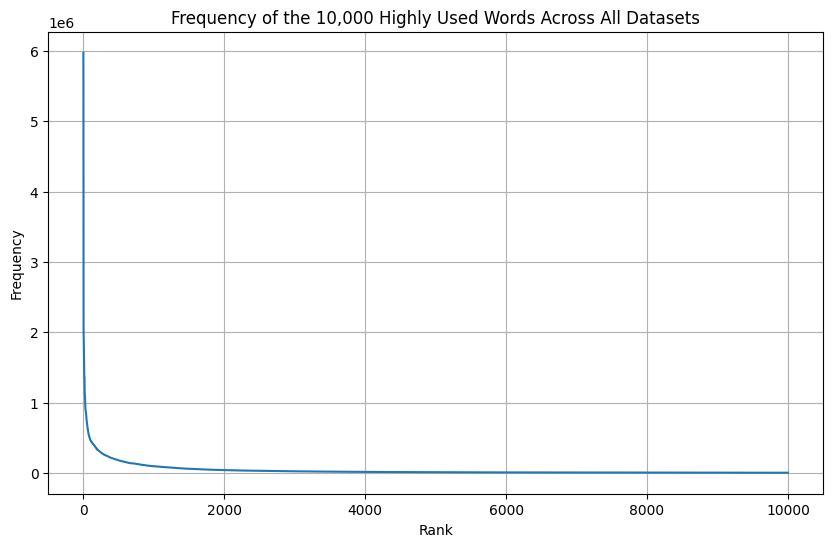

In [14]:
# Plot the 10000 Most Frequent Words used in the Cleaned Content

# Initialize an empty Counter object to store word frequencies
total_word_counts = Counter()

# Iterate over each DataFrame and accumulate word frequencies
for df in dfs:
    # Combine all text into a single string
    all_text = ' '.join(df['cleaned_content'].astype(str))

    # Define a regular expression pattern to match only alphabetic words
    word_pattern = r'\b[A-Za-z]+\b'

    # Tokenize the text into words using the word pattern
    words = re.findall(word_pattern, all_text.lower())

    # Count the frequency of each word
    word_counts = Counter(words)

    # Update the total word counts
    total_word_counts.update(word_counts)

# Sort the word counts by frequency in descending order
sorted_word_counts = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)

# Get the 10,000 most frequent words
top_10000_words = sorted_word_counts[:10000]

# Extract words and frequencies for plotting
words = [word for word, freq in top_10000_words]
frequencies = [freq for word, freq in top_10000_words]

# Plot the frequency of the 10,000 most frequent words
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10001), frequencies)
plt.title('Frequency of the 10,000 Highly Used Words Across All Datasets')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# The Plot illustrates that the Top 2000 words had the highest frequency level compared to the rest.

In [7]:
# Finding the 100 Most Frequent Words used after applying STOP WORDS & Stemming 
# Only 1 datset is used to calculate the same due multiple failure in processing the large amount of data
# Attempts were made to spilit the process and work on Processed output. Still the attempt....
# Encountered multiple time outs & exceeded GPU utilization limit

# Define a regular expression pattern to match only alphabetic words
word_pattern = r'\b[A-Za-z]+\b'

# Tokenize the cleaned text
df['tokens'] = df['cleaned_content'].apply(lambda x: word_tokenize(str(x).lower()))

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Initialize the Porter stemmer
porter = PorterStemmer()

# Apply stemming and remove unnecessary characters or symbols
df['stemmed_tokens'] = df['tokens'].apply(lambda x: [porter.stem(word) for word in x if re.match(word_pattern, word)])

# Flatten the list of stemmed tokens
stemmed_words = [word for sublist in df['stemmed_tokens'] for word in sublist]

# Count the frequency of each stemmed word
word_counts = Counter(stemmed_words)

# Get the 100 most frequent words
top_100_words = word_counts.most_common(100)

# Print the top 100 words and their frequencies
for word, frequency in top_100_words:
    print(word, frequency)

say 521073
one 321074
would 295058
peopl 280941
state 275983
make 268094
year 254650
time 245895
go 244810
like 238060
trump 231796
get 227834
new 211739
take 210385
also 203116
american 191883
use 190900
presid 189671
know 184434
well 180423
see 164616
even 161288
obama 158392
come 152768
right 150741
report 149855
govern 149652
nation 145795
work 145108
day 144633
mani 143877
think 143228
could 140157
good 139603
may 131622
call 131220
first 130648
world 130417
u 129223
tell 128524
want 128273
way 125151
two 123787
find 123652
life 123570
countri 122759
need 121439
give 120966
news 118704
republican 116408
polit 114099
show 113336
support 112152
man 109959
law 109427
last 106868
democrat 104674
war 102366
thing 102131
child 102112
help 102093
back 101894
includ 100451
health 100093
america 98962
much 98072
elect 97771
hous 97128
high 95763
long 94370
public 92721
unit 92606
clinton 89261
look 89223
vote 87615
post 87422
woman 86593
issu 86394
week 86244
chang 86241
group 85942
stori 

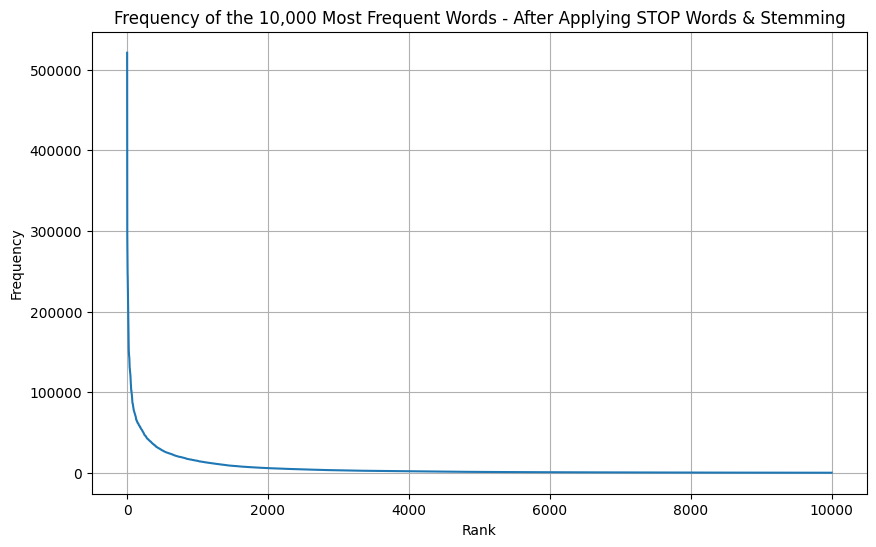

In [3]:
# Plot the 10000 Most Frequent Words used in the Cleaned Content after applying STOP WORDS & Stemming 
# Only 1 datset is used to calculate the same due multiple failure in processing the large amount of data
# Attempts were made to spilit the process and work on Processed output. Still the attempt....
# Encountered multiple time outs & exceeded GPU utilization limit


# Define a regular expression pattern to match only alphabetic words
word_pattern = r'\b[A-Za-z]+\b'

# Tokenize the cleaned text
df['tokens'] = df['cleaned_content'].apply(lambda x: word_tokenize(str(x).lower()))

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Initialize the Porter stemmer
porter = PorterStemmer()

# Apply stemming and remove unnecessary characters or symbols
df['stemmed_tokens'] = df['tokens'].apply(lambda x: [porter.stem(word) for word in x if re.match(word_pattern, word)])

# Flatten the list of stemmed tokens
stemmed_words = [word for sublist in df['stemmed_tokens'] for word in sublist]

# Count the frequency of each stemmed word
word_counts = Counter(stemmed_words)

# Get the 10,000 most common words
top_10000_words = word_counts.most_common(10000)

# Extract words and frequencies for plotting
words = [word for word, freq in top_10000_words]
frequencies = [freq for word, freq in top_10000_words]

# Plot the frequency of the 10,000 most frequent words
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10001), frequencies)
plt.title('Frequency of the 10,000 Most Frequent Words - After Applying STOP Words & Stemming')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# After the Implimentation STOP words & Stemming
# The Plot illustrates that the Top 2000 - 2500 words had the highest frequency level compared to the rest.